## COX PH MODEL ANALYSIS

In [1]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
gbc_patients = pd.read_csv("data_cox.csv")

In [3]:
gbc_patients.head()

,Thyroidism,Diabetes,HTN,Family_cancer_history,ECOG_final,Gall_stone_final,Pathology,Cancer_presentation_final,Tumour_stage_final,Mets_site_final,...,Date_diagnosis,AGE,BMI_DETAILS,BILIRUBIN TOTAL,AST - SGOT,ALT - SGPT,ALK PHOS [ALP],GAMMA GT,ALBUMIN,Time_overall_study
0,No,No,Yes,No,1,Yes,Adenocarcinoma,Incidental,Stage IV,Not applicable,...,2016-12-23,60,24.93,0.5,23.0,28.0,147.0,21.0,4.7,24.246904
1,No,No,No,No,1,Not known,Adenocarcinoma,Metastatic,Stage IV,Liver,...,2017-01-30,58,22.55,0.4,348.0,78.0,206.0,481.0,3.2,11.860613
2,No,No,Yes,No,2,Yes,Adenocarcinoma,Metastatic,Stage IV,Liver,...,2017-01-24,62,0.00,NaN,NaN,NaN,NaN,NaN,NaN,17.248814
3,No,Yes,Yes,Not known,1,Yes,MiNEN,Incidental,Stage II,Not applicable,...,2017-01-04,62,20.22,1.0,36.0,31.0,108.0,21.0,4.6,23.852646
4,Hypothyroidism,Not known,Yes,Not known,Not known,Yes,Adenocarcinoma,Locally advanced,Not known,Not applicable,...,2017-02-16,77,24.15,20.5,286.0,130.0,492.0,209.0,2.6,12.846260


In [4]:
gbc_patients.isnull().sum()

Thyroidism                    19
Diabetes                      17
HTN                           17
Family_cancer_history         19
ECOG_final                    16
Gall_stone_final              18
Pathology                      0
Cancer_presentation_final     25
Tumour_stage_final             0
Mets_site_final               28
Surgery_final                  0
Treatment_final               31
Status                         0
Date_event                     0
Date_diagnosis                 0
AGE                            0
BMI_DETAILS                   76
BILIRUBIN TOTAL              153
AST - SGOT                   153
ALT - SGPT                   154
ALK PHOS [ALP]               153
GAMMA GT                     154
ALBUMIN                      153
Time_overall_study             0
dtype: int64

In [5]:
#################no need
#filtered_data = gbc_patients.dropna(subset=[ 'Status','Date_event', 'Date_diagnosis'])
#filtered_data.shape


In [6]:
#filtered_data.value_counts()

In [7]:
# Calculate the difference of Date_event and Date_diagnosis in months
#filtered_data['Date_event'] = pd.to_datetime(filtered_data['Date_event'])
#filtered_data['Date_diagnosis'] = pd.to_datetime(filtered_data['Date_diagnosis'])

# Create the new column "Time_overall_study"
#filtered_data['Time_overall_study'] = ((filtered_data['Date_event'] - filtered_data['Date_diagnosis']).dt.days / 30).astype('float')


In [8]:
#filtered_data.head()

In [9]:
#filtered_data['Time_overall_study'].describe()[['min', 'max']]

In [10]:
#min_value = filtered_data['Time_overall_study'].min()

# Use boolean indexing to get the observation(s) with the minimum value
#min_value_observation = filtered_data[filtered_data['Time_overall_study'] == min_value]

# Display the observation(s)
#print("Observation(s) with the minimum 'Time_overall_study' value:")
#min_value_observation[["Date_event", "Date_diagnosis"]]

In [11]:
gbc_patients['Date_event'] = pd.to_datetime(gbc_patients['Date_event'])
gbc_patients['Date_diagnosis'] = pd.to_datetime(gbc_patients['Date_diagnosis'])

# Check the oldest and latest date
oldest_date = gbc_patients['Date_event'].min()
latest_date = gbc_patients['Date_event'].max()
oldest_date_d = gbc_patients['Date_diagnosis'].min()
latest_date_d = gbc_patients['Date_diagnosis'].max()
# Display the results
print("Oldest Date:", oldest_date)
print("Latest Date:", latest_date)
print("Oldest Date_d:", oldest_date_d)
print("Latest Date_d:", latest_date_d)

Oldest Date: 2017-01-02 00:00:00
Latest Date: 2021-09-07 00:00:00
Oldest Date_d: 2008-08-15 00:00:00
Latest Date_d: 2020-02-05 00:00:00


In [12]:
#Time_overall_study feature
#value_to_delete = min_value

# Delete the row with the specified value
#filtered_data = filtered_data[filtered_data['Time_overall_study'] != value_to_delete]

#filtered_data.shape

In [13]:
gbc_patients["Status"].value_counts()

True     424
False      1
Name: Status, dtype: int64

In [14]:
# Mapping of values to be replaced
status_mapping = {'True': 1, 'False': 0}

# Replace values in the "Status" column
gbc_patients['Status'] = gbc_patients['Status'].replace(status_mapping)


In [15]:
gbc_patients['Status'].value_counts()

True     424
False      1
Name: Status, dtype: int64

In [16]:
df = gbc_patients.copy()

In [17]:
###########################################################

### DATA CLEANING ###

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Thyroidism                 406 non-null    object        
 1   Diabetes                   408 non-null    object        
 2   HTN                        408 non-null    object        
 3   Family_cancer_history      406 non-null    object        
 4   ECOG_final                 409 non-null    object        
 5   Gall_stone_final           407 non-null    object        
 6   Pathology                  425 non-null    object        
 7   Cancer_presentation_final  400 non-null    object        
 8   Tumour_stage_final         425 non-null    object        
 9   Mets_site_final            397 non-null    object        
 10  Surgery_final              425 non-null    object        
 11  Treatment_final            394 non-null    object        
 12  Status  

In [19]:
# Filter columns with object data type
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = df[column].value_counts()
    category_counts[column] = counts

# Print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(counts)
    print()

Counts for Thyroidism:
No                305
Not known          66
Hypothyroidism     35
Name: Thyroidism, dtype: int64

Counts for Diabetes:
No           240
Yes          103
Not known     65
Name: Diabetes, dtype: int64

Counts for HTN:
No           207
Yes          141
Not known     60
Name: HTN, dtype: int64

Counts for Family_cancer_history:
Not known    215
No           154
Yes           37
Name: Family_cancer_history, dtype: int64

Counts for ECOG_final:
1            221
2             92
3             37
Not known     29
4             16
0             14
Name: ECOG_final, dtype: int64

Counts for Gall_stone_final:
Yes          171
Not known    118
No           117
Polyp          1
Name: Gall_stone_final, dtype: int64

Counts for Pathology:
Adenocarcinoma                  359
Carcinoma                        31
Adenosquamous carcinoma          14
Neuroendocrine carcinoma          7
Others                            7
Mucinous adenocarcinoma           3
MiNEN                      

In [20]:
## PATHOLOGY ##

In [21]:
# List of categories to keep
categories_to_keep = ['Adenocarcinoma', 'Adenosquamous carcinoma', 'Neuroendocrine carcinoma']

# Replace categories other than those to keep with "Others"
df['Pathology'] = df['Pathology'].where(df['Pathology'].isin(categories_to_keep), 'Others')

In [22]:
df['Pathology'].value_counts()

Adenocarcinoma              359
Others                       45
Adenosquamous carcinoma      14
Neuroendocrine carcinoma      7
Name: Pathology, dtype: int64

In [23]:
## Mets_site_final ##

In [24]:
df["Mets_site_final"].value_counts()

Not applicable          158
Liver                   142
Peritoneum & Omentum     34
Lungs                    16
Liver & Lungs             9
Portsite                  8
Liver & Bone              7
Stomach & Intestine       5
Pancreas                  3
Ovary & Uterus            3
Adrenal gland             2
Not known                 2
Right hypochondrium       2
Lungs and bone            1
Bone                      1
Chest                     1
FALSE                     1
Lung,Bone                 1
Brain                     1
Name: Mets_site_final, dtype: int64

In [25]:
# List of categories to keep
categories_to_keep = ['Liver', 'Peritoneum & Omentum', 'Lungs']

# Replace categories other than those to keep with "Others"
df['Mets_site_final'] = df['Mets_site_final'].where(df['Mets_site_final'].isin(categories_to_keep), 'Others')

In [26]:
df["Mets_site_final"].value_counts()

Others                  233
Liver                   142
Peritoneum & Omentum     34
Lungs                    16
Name: Mets_site_final, dtype: int64

## Cox PH Model Analysis

In [27]:
df.shape

(425, 24)

In [28]:
df['Status'].value_counts()

True     424
False      1
Name: Status, dtype: int64

In [29]:
df.columns

Index(['Thyroidism', 'Diabetes', 'HTN', 'Family_cancer_history', 'ECOG_final',
       'Gall_stone_final', 'Pathology', 'Cancer_presentation_final',
       'Tumour_stage_final', 'Mets_site_final', 'Surgery_final',
       'Treatment_final', 'Status', 'Date_event', 'Date_diagnosis', 'AGE',
       'BMI_DETAILS', 'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT',
       'ALK PHOS [ALP]', 'GAMMA GT', 'ALBUMIN', 'Time_overall_study'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Thyroidism                 406 non-null    object        
 1   Diabetes                   408 non-null    object        
 2   HTN                        408 non-null    object        
 3   Family_cancer_history      406 non-null    object        
 4   ECOG_final                 409 non-null    object        
 5   Gall_stone_final           407 non-null    object        
 6   Pathology                  425 non-null    object        
 7   Cancer_presentation_final  400 non-null    object        
 8   Tumour_stage_final         425 non-null    object        
 9   Mets_site_final            425 non-null    object        
 10  Surgery_final              425 non-null    object        
 11  Treatment_final            394 non-null    object        
 12  Status  

In [31]:
# Filter columns with object data type
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = df[column].value_counts()
    category_counts[column] = counts

# Print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(counts)
    print()

Counts for Thyroidism:
No                305
Not known          66
Hypothyroidism     35
Name: Thyroidism, dtype: int64

Counts for Diabetes:
No           240
Yes          103
Not known     65
Name: Diabetes, dtype: int64

Counts for HTN:
No           207
Yes          141
Not known     60
Name: HTN, dtype: int64

Counts for Family_cancer_history:
Not known    215
No           154
Yes           37
Name: Family_cancer_history, dtype: int64

Counts for ECOG_final:
1            221
2             92
3             37
Not known     29
4             16
0             14
Name: ECOG_final, dtype: int64

Counts for Gall_stone_final:
Yes          171
Not known    118
No           117
Polyp          1
Name: Gall_stone_final, dtype: int64

Counts for Pathology:
Adenocarcinoma              359
Others                       45
Adenosquamous carcinoma      14
Neuroendocrine carcinoma      7
Name: Pathology, dtype: int64

Counts for Cancer_presentation_final:
Metastatic          239
Incidental           9

In [32]:
# Drop rows with any missing values
clean_data = df.dropna()

print("Cleaned DataFrame:")
print(clean_data.shape)

Cleaned DataFrame:
(248, 24)


In [33]:
clean_data.columns

Index(['Thyroidism', 'Diabetes', 'HTN', 'Family_cancer_history', 'ECOG_final',
       'Gall_stone_final', 'Pathology', 'Cancer_presentation_final',
       'Tumour_stage_final', 'Mets_site_final', 'Surgery_final',
       'Treatment_final', 'Status', 'Date_event', 'Date_diagnosis', 'AGE',
       'BMI_DETAILS', 'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT',
       'ALK PHOS [ALP]', 'GAMMA GT', 'ALBUMIN', 'Time_overall_study'],
      dtype='object')

In [34]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 421
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Thyroidism                 248 non-null    object        
 1   Diabetes                   248 non-null    object        
 2   HTN                        248 non-null    object        
 3   Family_cancer_history      248 non-null    object        
 4   ECOG_final                 248 non-null    object        
 5   Gall_stone_final           248 non-null    object        
 6   Pathology                  248 non-null    object        
 7   Cancer_presentation_final  248 non-null    object        
 8   Tumour_stage_final         248 non-null    object        
 9   Mets_site_final            248 non-null    object        
 10  Surgery_final              248 non-null    object        
 11  Treatment_final            248 non-null    object        
 12  Status  

In [35]:
# Filter columns with object data type
categorical_columns = clean_data.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = clean_data[column].value_counts()
    category_counts[column] = counts

# Print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(counts)
    print()

Counts for Thyroidism:
No                196
Hypothyroidism     26
Not known          26
Name: Thyroidism, dtype: int64

Counts for Diabetes:
No           159
Yes           64
Not known     25
Name: Diabetes, dtype: int64

Counts for HTN:
No           130
Yes           96
Not known     22
Name: HTN, dtype: int64

Counts for Family_cancer_history:
Not known    122
No           100
Yes           26
Name: Family_cancer_history, dtype: int64

Counts for ECOG_final:
1            153
2             62
3             12
0             11
Not known      7
4              3
Name: ECOG_final, dtype: int64

Counts for Gall_stone_final:
Yes          119
Not known     68
No            60
Polyp          1
Name: Gall_stone_final, dtype: int64

Counts for Pathology:
Adenocarcinoma              218
Others                       18
Adenosquamous carcinoma       6
Neuroendocrine carcinoma      6
Name: Pathology, dtype: int64

Counts for Cancer_presentation_final:
Metastatic          142
Incidental           6

In [36]:
"Age", "Gender", "ECOG", "BMI", "Gallstone", "Cancer at presentation", "Tumor Stage", "Treatment", "Thyroid"

('Age',
 'Gender',
 'ECOG',
 'BMI',
 'Gallstone',
 'Cancer at presentation',
 'Tumor Stage',
 'Treatment',
 'Thyroid')

In [37]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 421
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Thyroidism                 248 non-null    object        
 1   Diabetes                   248 non-null    object        
 2   HTN                        248 non-null    object        
 3   Family_cancer_history      248 non-null    object        
 4   ECOG_final                 248 non-null    object        
 5   Gall_stone_final           248 non-null    object        
 6   Pathology                  248 non-null    object        
 7   Cancer_presentation_final  248 non-null    object        
 8   Tumour_stage_final         248 non-null    object        
 9   Mets_site_final            248 non-null    object        
 10  Surgery_final              248 non-null    object        
 11  Treatment_final            248 non-null    object        
 12  Status  

In [38]:
# List of columns to drop
columns_to_drop = ['Date_diagnosis','Date_event', "Thyroidism", 'HTN', 'Family_cancer_history', 'AGE', 'BMI_DETAILS', 'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT', 'ALK PHOS [ALP]','GAMMA GT', 'ALBUMIN' ]

# Drop the specified columns
clean_data = clean_data.drop(columns=columns_to_drop)

In [39]:
#### Dropping Unnecessary columns from our analysis

In [40]:
# Select categorical columns
categorical_columns = clean_data.select_dtypes(include=['object'])

# Select continuous columns (excluding categorical)
continuous_columns = clean_data.select_dtypes(exclude=['object'])

In [41]:
continuous_columns

,Status,Time_overall_study
0,True,24.246904
1,True,11.860613
3,True,23.852646
4,True,12.846260
5,True,6.275283
...,...,...
413,True,8.148011
414,True,6.439557
416,True,4.928233
420,True,2.694100


In [42]:
categorical_columns

,Diabetes,ECOG_final,Gall_stone_final,Pathology,Cancer_presentation_final,Tumour_stage_final,Mets_site_final,Surgery_final,Treatment_final
0,No,1,Yes,Adenocarcinoma,Incidental,Stage IV,Others,Radical,Curative
1,No,1,Not known,Adenocarcinoma,Metastatic,Stage IV,Liver,No,Disease Control
3,Yes,1,Yes,Others,Incidental,Stage II,Others,Simple,Disease Control
4,Not known,Not known,Yes,Adenocarcinoma,Locally advanced,Not known,Others,No,Palliative_care
5,Not known,Not known,Yes,Adenocarcinoma,Metastatic,Stage IV,Liver,No,Disease Control
...,...,...,...,...,...,...,...,...,...
413,No,1,Yes,Adenocarcinoma,Metastatic,Stage IV,Liver,No,Disease Control
414,No,1,Yes,Adenocarcinoma,Metastatic,Stage IV,Others,No,Disease Control
416,No,1,Yes,Adenocarcinoma,Incidental,Stage IV,Liver,Simple,Disease Control
420,No,1,Yes,Adenocarcinoma,Metastatic,Stage IV,Liver,No,Palliative_care


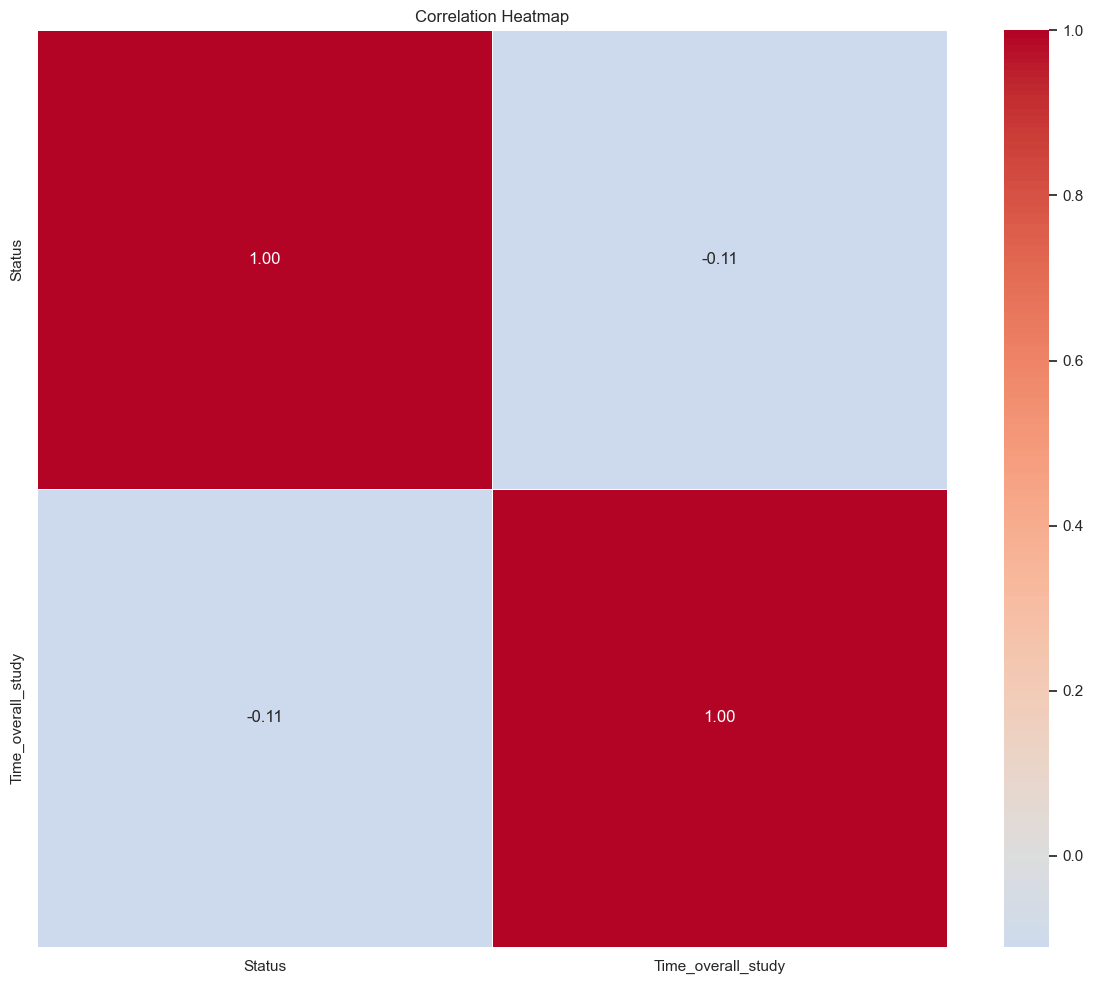

Original DataFrame shape: (248, 2)
DataFrame after removing highly correlated variables shape: (248, 2)


C:\Users\sriva\AppData\Local\Temp\ipykernel_2052\743500439.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming continuous_columns is a NumPy array
# Define your column names (replace with actual column names)
column_names = continuous_columns.columns.tolist()  # List of column names

# Convert it to a Pandas DataFrame
continuous_columns_df = pd.DataFrame(continuous_columns, columns=column_names)

# Calculate correlation matrix
correlation_matrix = continuous_columns_df.corr()

# Rest of your code remains the same
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.set(font_scale=1)  # Adjust font size for annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

# Add plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.tight_layout()
plt.show()

# Function to remove highly correlated variables
def remove_highly_correlated(continuous_columns_df, threshold=0.9):
    corr_matrix = continuous_columns_df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    continuous_columns_df = continuous_columns_df.drop(columns=to_drop)
    return continuous_columns_df

# Remove highly correlated variables
threshold = 0.9
continuous_columns_no_high_correlation = remove_highly_correlated(continuous_columns_df, threshold)

print("Original DataFrame shape:", continuous_columns_df.shape)
print("DataFrame after removing highly correlated variables shape:", continuous_columns_no_high_correlation.shape)


In [44]:
##performing one hot encoding to the categorical variables in order to pass the weightage of categorical variables in the form of numbers to our model. 


In [64]:
# Perform one-hot encoding on categorical columns
encoded_categorical = pd.get_dummies(categorical_columns, drop_first=True)
encoded_categorical.head(30)

,Diabetes_Not known,Diabetes_Yes,ECOG_final_1,ECOG_final_2,ECOG_final_3,ECOG_final_4,ECOG_final_Not known,Gall_stone_final_Not known,Gall_stone_final_Polyp,Gall_stone_final_Yes,...,Tumour_stage_final_Stage III,Tumour_stage_final_Stage IV,Mets_site_final_Lungs,Mets_site_final_Others,Mets_site_final_Peritoneum & Omentum,Surgery_final_Partial,Surgery_final_Radical,Surgery_final_Simple,Treatment_final_Disease Control,Treatment_final_Palliative_care
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
8,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
11,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [65]:
encoded_categorical.isnull().sum()

Diabetes_Not known                            0
Diabetes_Yes                                  0
ECOG_final_1                                  0
ECOG_final_2                                  0
ECOG_final_3                                  0
ECOG_final_4                                  0
ECOG_final_Not known                          0
Gall_stone_final_Not known                    0
Gall_stone_final_Polyp                        0
Gall_stone_final_Yes                          0
Pathology_Adenosquamous carcinoma             0
Pathology_Neuroendocrine carcinoma            0
Pathology_Others                              0
Cancer_presentation_final_Locally advanced    0
Cancer_presentation_final_Metastatic          0
Tumour_stage_final_Not known                  0
Tumour_stage_final_Stage II                   0
Tumour_stage_final_Stage III                  0
Tumour_stage_final_Stage IV                   0
Mets_site_final_Lungs                         0
Mets_site_final_Others                  

In [66]:
print(encoded_categorical.isnull().sum())
print("*********************************")
print(continuous_columns_no_high_correlation.isnull().sum())

Diabetes_Not known                            0
Diabetes_Yes                                  0
ECOG_final_1                                  0
ECOG_final_2                                  0
ECOG_final_3                                  0
ECOG_final_4                                  0
ECOG_final_Not known                          0
Gall_stone_final_Not known                    0
Gall_stone_final_Polyp                        0
Gall_stone_final_Yes                          0
Pathology_Adenosquamous carcinoma             0
Pathology_Neuroendocrine carcinoma            0
Pathology_Others                              0
Cancer_presentation_final_Locally advanced    0
Cancer_presentation_final_Metastatic          0
Tumour_stage_final_Not known                  0
Tumour_stage_final_Stage II                   0
Tumour_stage_final_Stage III                  0
Tumour_stage_final_Stage IV                   0
Mets_site_final_Lungs                         0
Mets_site_final_Others                  

In [67]:
## Taking only 248 observations into the analysis

In [68]:
##performing one hot encoding to the categorical variables in order to pass the weightage of categorical variables in the form of numbers to our model.

In [69]:
encoded_categorical.reset_index(drop=True, inplace=True)
continuous_columns_no_high_correlation.reset_index(drop=True, inplace=True)


In [70]:
# Concatenate the encoded categorical columns with continuous columns
working_dataframe = pd.concat([encoded_categorical, continuous_columns_no_high_correlation], axis=1)


In [71]:
working_dataframe.columns

Index(['Diabetes_Not known', 'Diabetes_Yes', 'ECOG_final_1', 'ECOG_final_2',
       'ECOG_final_3', 'ECOG_final_4', 'ECOG_final_Not known',
       'Gall_stone_final_Not known', 'Gall_stone_final_Polyp',
       'Gall_stone_final_Yes', 'Pathology_Adenosquamous carcinoma',
       'Pathology_Neuroendocrine carcinoma', 'Pathology_Others',
       'Cancer_presentation_final_Locally advanced',
       'Cancer_presentation_final_Metastatic', 'Tumour_stage_final_Not known',
       'Tumour_stage_final_Stage II', 'Tumour_stage_final_Stage III',
       'Tumour_stage_final_Stage IV', 'Mets_site_final_Lungs',
       'Mets_site_final_Others', 'Mets_site_final_Peritoneum & Omentum',
       'Surgery_final_Partial', 'Surgery_final_Radical',
       'Surgery_final_Simple', 'Treatment_final_Disease Control',
       'Treatment_final_Palliative_care', 'Status', 'Time_overall_study'],
      dtype='object')

In [72]:
df = working_dataframe.copy()

In [73]:
df.shape

(248, 29)

In [74]:
df["Status"].value_counts()

True     247
False      1
Name: Status, dtype: int64

In [75]:
df.isnull().sum()

Diabetes_Not known                            0
Diabetes_Yes                                  0
ECOG_final_1                                  0
ECOG_final_2                                  0
ECOG_final_3                                  0
ECOG_final_4                                  0
ECOG_final_Not known                          0
Gall_stone_final_Not known                    0
Gall_stone_final_Polyp                        0
Gall_stone_final_Yes                          0
Pathology_Adenosquamous carcinoma             0
Pathology_Neuroendocrine carcinoma            0
Pathology_Others                              0
Cancer_presentation_final_Locally advanced    0
Cancer_presentation_final_Metastatic          0
Tumour_stage_final_Not known                  0
Tumour_stage_final_Stage II                   0
Tumour_stage_final_Stage III                  0
Tumour_stage_final_Stage IV                   0
Mets_site_final_Lungs                         0
Mets_site_final_Others                  

In [76]:
from lifelines import CoxPHFitter 

cph = CoxPHFitter(alpha=0.05)
cph.fit(df, duration_col='Time_overall_study', 
              event_col='Status',
              show_progress = True)

Iteration 1: norm_delta = 1.06579, step_size = 0.9500, log_lik = -1120.70373, newton_decrement = 53.52252, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.55480, step_size = 0.9500, log_lik = -1142.37809, newton_decrement = 69.49229, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.09167, step_size = 0.9500, log_lik = -1081.36977, newton_decrement = 0.39109, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00389, step_size = 1.0000, log_lik = -1080.98587, newton_decrement = 0.00171, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00003, step_size = 1.0000, log_lik = -1080.98415, newton_decrement = 0.00000, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1080.98415, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 248 total observations, 1 right-censored observations>

In [77]:
cph.print_summary(decimals=3)


<lifelines.CoxPHFitter: fitted with 248 total observations, 1 right-censored observations>
             duration col = 'Time_overall_study'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 248
number of events observed = 247
   partial log-likelihood = -1080.984
         time fit was run = 2023-11-27 16:48:55 UTC

---
                                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                          
Diabetes_Not known                         -0.174      0.841      0.254           -0.672            0.325                0.511                1.384
Diabetes_Yes                               -0.004      0.996      0.180           -0.357            0.350                0.700                1.419
ECOG_final_1                               -0.303      0.739      0.353           -0.995            0.390                0.370                1.476
ECOG_final_2                               -0.126      0.882      0.362           -0.835            0.583                0.434                1.792
ECOG_final_3                                0.225      1.252      0.479           -0.715            1.164                0.489                3.202
ECOG_final_4                               -0.035      0.966      0.704           -1.416            1.345                0.243                3.840
ECOG_final_Not known                       -0.487      0.614      0.574           -1.612            0.638                0.199                1.892
Gall_stone_final_Not known                  0.549      1.731      0.194            0.168            0.929                1.183                2.533
Gall_stone_final_Polyp                     -0.455      0.635      1.029           -2.472            1.563                0.084                4.771
Gall_stone_final_Yes                        0.345      1.413      0.178           -0.004            0.694                0.996                2.002
Pathology_Adenosquamous carcinoma           0.904      2.469      0.452            0.018            1.790                1.018                5.989
Pathology_Neuroendocrine carcinoma          1.236      3.442      0.512            0.232            2.240                1.261                9.395
Pathology_Others                           -0.145      0.865      0.272           -0.677            0.388                0.508                1.474
Cancer_presentation_final_Locally advanced  0.116      1.123      0.269           -0.410            0.642                0.663                1.901
Cancer_presentation_final_Metastatic       -0.133      0.875      0.223           -0.570            0.303                0.566                1.353
Tumour_stage_final_Not known                0.092      1.097      0.535           -0.957            1.142                0.384                3.133
Tumour_stage_final_Stage II                 0.289      1.335      0.588           -0.863            1.441                0.422                4.223
Tumour_stage_final_Stage III                0.187      1.206      0.489           -0.772            1.147                0.462                3.148
Tumour_stage_final_Stage IV                -0.088      0.916      0.450           -0.969            0.794                0.379                2.212
Mets_site_final_Lungs                       0.062      1.063      0.358           -0.640            0.763                0.527                2.145
Mets_site_final_Others                     -0.520      0.595      0.186           -0.885           -0.154                0.413                0.857
Mets_site_final_Peritoneum & Omentum       -0.280      0.756      0.317           -0.902            0.342                0.406                1.408
Surgery_final_Partial                      -0.867      0.420      0.671     

## Feature Importance #

### Using Cox PH Model - Statistical Significance based on p-value ###

In [78]:
########### FEATURE IMPORTANCE ##############

In [79]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Load your cancer patient data into a pandas DataFrame with 'time' and 'event' columns
# Replace 'data' with your own dataset
data = df.copy()

# Create a Cox Proportional Hazard model
cph = CoxPHFitter()
cph.fit(data, duration_col='Time_overall_study', event_col='Status')

# Display feature importance
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 248 total observations, 1 right-censored observations>
             duration col = 'Time_overall_study'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 248
number of events observed = 247
   partial log-likelihood = -1080.98
         time fit was run = 2023-11-27 16:49:03 UTC

---
                                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                          
Diabetes_Not known                          -0.17       0.84       0.25            -0.67             0.33                 0.51                 1.38
Diabetes_Yes                                -0.00       1.00       0.18            -0.36             0.35                 0.70                 1.42
ECOG_final_1                                -0.30       0.74       0.35            -1.00             0.39                 0.37                 1.48
ECOG_final_2                                -0.13       0.88       0.36            -0.84             0.58                 0.43                 1.79
ECOG_final_3                                 0.22       1.25       0.48            -0.71             1.16                 0.49                 3.20
ECOG_final_4                                -0.04       0.97       0.70            -1.42             1.35                 0.24                 3.84
ECOG_final_Not known                        -0.49       0.61       0.57            -1.61             0.64                 0.20                 1.89
Gall_stone_final_Not known                   0.55       1.73       0.19             0.17             0.93                 1.18                 2.53
Gall_stone_final_Polyp                      -0.45       0.63       1.03            -2.47             1.56                 0.08                 4.77
Gall_stone_final_Yes                         0.35       1.41       0.18            -0.00             0.69                 1.00                 2.00
Pathology_Adenosquamous carcinoma            0.90       2.47       0.45             0.02             1.79                 1.02                 5.99
Pathology_Neuroendocrine carcinoma           1.24       3.44       0.51             0.23             2.24                 1.26                 9.39
Pathology_Others                            -0.14       0.87       0.27            -0.68             0.39                 0.51                 1.47
Cancer_presentation_final_Locally advanced   0.12       1.12       0.27            -0.41             0.64                 0.66                 1.90
Cancer_presentation_final_Metastatic        -0.13       0.88       0.22            -0.57             0.30                 0.57                 1.35
Tumour_stage_final_Not known                 0.09       1.10       0.54            -0.96             1.14                 0.38                 3.13
Tumour_stage_final_Stage II                  0.29       1.33       0.59            -0.86             1.44                 0.42                 4.22
Tumour_stage_final_Stage III                 0.19       1.21       0.49            -0.77             1.15                 0.46                 3.15
Tumour_stage_final_Stage IV                 -0.09       0.92       0.45            -0.97             0.79                 0.38                 2.21
Mets_site_final_Lungs                        0.06       1.06       0.36            -0.64             0.76                 0.53                 2.14
Mets_site_final_Others                      -0.52       0.59       0.19            -0.89            -0.15                 0.41                 0.86
Mets_site_final_Peritoneum & Omentum        -0.28       0.76       0.32            -0.90             0.34                 0.41                 1.41
Surgery_final_Partial                       -0.87       0.42       0.67      

**1. Concordance (C-index):**

**Definition:** The Concordance Index (C-index) is a measure of the discriminatory power of a survival model.

**Explanation:** It quantifies how well the model can correctly rank the survival times of patients. A C-index value ranges from 0.5 to 1.0, where 0.5 indicates random chance (no discrimination), and 1.0 indicates perfect discrimination.

**Interpretation:** A C-index of 0.69 suggests that the model has a moderate ability to discriminate between patients with different survival outcomes. It correctly ranks the survival times for 69% of pairs of patients.


**2. Partial AIC (Akaike Information Criterion):**

**Definition:** The Akaike Information Criterion (AIC) is a measure of the goodness-of-fit of a statistical model.

**Explanation:** Partial AIC assesses the model fit after removing a specific covariate (feature) from the model. It quantifies how much the AIC improves when the feature is excluded.

**Interpretation:** A lower Partial AIC value indicates that the model with the covariate removed is a better fit for the data. In your case, the value of 1738.19 suggests that removing a particular covariate from the model improves its fit.


**3. Log-Likelihood Ratio Test:**

**Definition:** The log-likelihood ratio test assesses whether adding a particular covariate to a model significantly improves its fit compared to a simpler model without the covariate.

**Explanation:** It calculates the difference in the log-likelihood (a measure of how well the model fits the data) between the two models and tests if the difference is statistically significant.

**Interpretation:** The test statistic of 90.13 on 35 degrees of freedom (df) suggests that adding the covariate significantly improves the model's fit. A higher test statistic indicates stronger evidence for the improvement.


**4. -log2(p) of LL-Ratio Test:**

**Definition:** This metric is a transformation of the p-value obtained from the log-likelihood ratio test.

**Explanation:** Taking the negative base-2 logarithm of the p-value converts it into a more interpretable scale. A smaller -log2(p) indicates a more significant result.

**Interpretation:** An -log2(p) value of 20.01 suggests a highly significant result. It means that the improvement in model fit by adding the covariate is supported by strong statistical evidence.

#### Based on p-values, there are no significant factors present in our data as per the cox-ph model.

**In a clinical trial or medical research, while p-values are commonly used to assess statistical significance of features, they should not be the sole criterion for judging the importance of prognostic factors. The significance of prognostic factors should be evaluated through a combination of statistical analysis and clinical judgment.

Some of the factors that can be taken into account are -

**1. Effect Size:** While p-values provide information about statistical significance, they do not convey the practical or clinical significance of a prognostic factor. It's essential to consider the effect size, which quantifies the magnitude of the association between the factor and the outcome. A small p-value with a negligible effect size may not have practical importance.

**2. Clinical Relevance:** Prognostic factors should also be evaluated for their clinical relevance. Even if a factor is statistically significant, it may not have a meaningful impact on patient outcomes. Clinicians and researchers should assess whether the observed difference is clinically meaningful and relevant to patient care.

**3. Biological Plausibility:** Consider whether the observed association between a prognostic factor and the outcome aligns with what is known about the underlying biology and clinical understanding of the disease. Factors that have a plausible biological mechanism supporting their role as prognostic indicators are often considered more important.

**4. Clinical Expertise:** Clinical judgment and expertise play a critical role in interpreting the results of a clinical trial. Healthcare professionals  should provide validation to determine the clinical relevance and importance of prognostic factors.

#####################################################################
### HAZARD RATIOS PLOT BASED ON COX-PH MODEL 

In [80]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt


In [81]:
data = df.copy()

from lifelines.utils import survival_table_from_events

time_column = 'Time_overall_study'  
event_column = 'Status'  

cph = CoxPHFitter()
cph.fit(data, duration_col=time_column, event_col=event_column)


<lifelines.CoxPHFitter: fitted with 248 total observations, 1 right-censored observations>

In [82]:
feature_importance = pd.DataFrame({'Feature': data.drop([time_column, event_column], axis=1).columns,
                                   'Coefficient': cph.summary['coef'].values})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])


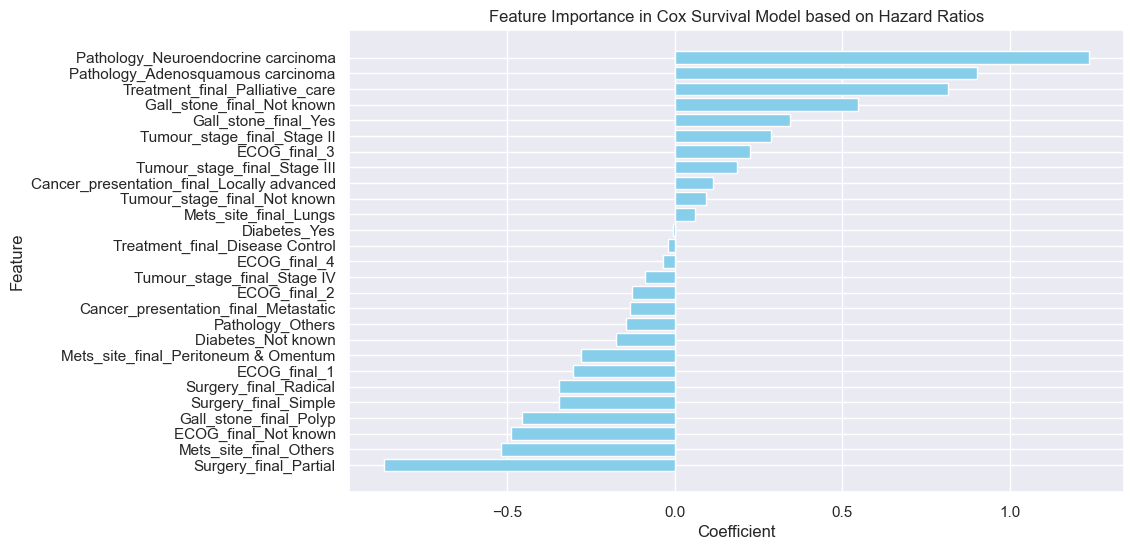

In [83]:
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Cox Survival Model based on Hazard Ratios')
plt.gca().invert_yaxis()  # Reverse the order to have the most important feature at the top
plt.show()


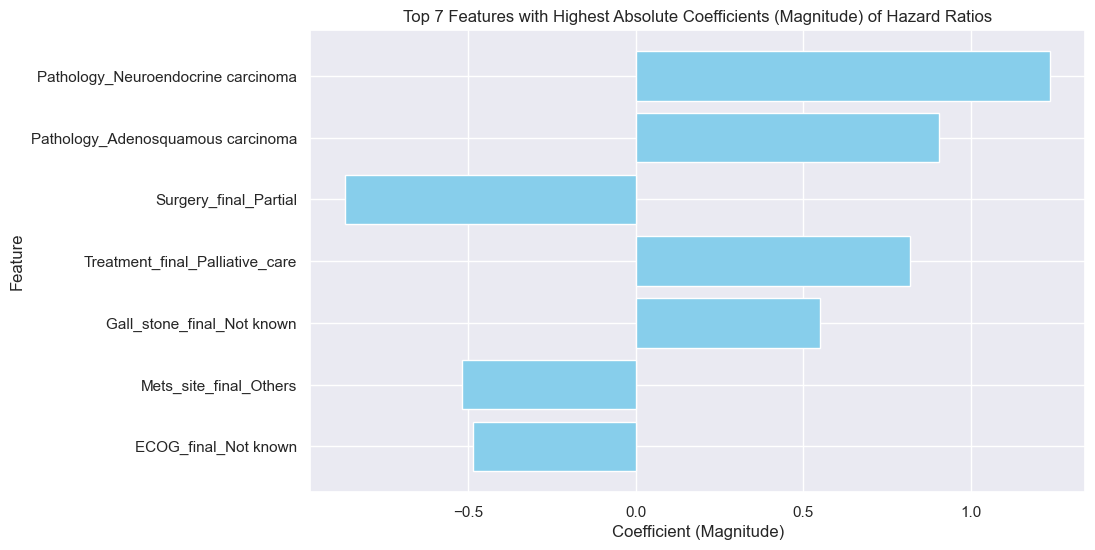

In [84]:
# Calculate the absolute values of coefficients and sort in descending order
feature_importance_sorted = feature_importance.copy()
feature_importance_sorted['Abs_Coefficient'] = abs(feature_importance_sorted['Coefficient'])
feature_importance_sorted = feature_importance_sorted.sort_values(by='Abs_Coefficient', ascending=False)

# Extract the top 7 features with the highest absolute coefficients
top_features = feature_importance_sorted['Feature'].head(7)

# Filter the feature_importance DataFrame to keep only the top features
top_feature_importance = feature_importance_sorted[feature_importance_sorted['Feature'].isin(top_features)]

# Plot the feature importance of the top 7 features based on magnitude
plt.figure(figsize=(10, 6))
plt.barh(top_feature_importance['Feature'], top_feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient (Magnitude)')
plt.ylabel('Feature')
plt.title('Top 7 Features with Highest Absolute Coefficients (Magnitude) of Hazard Ratios')
plt.gca().invert_yaxis()  # Reverse the order to have the most important feature at the top
plt.show()


#### Hazard ratios (HR) are commonly used in survival analysis to assess the impact of different factors, often referred to as covariates or features, on the hazard rate, which represents the risk of an event (e.g., death, disease progression) occurring at a given time.
#### While hazard ratios provide valuable insights into the influence of covariates on survival outcomes, they are typically used to measure the strength and direction of association rather than to directly derive feature importance or variable importance.
#### A hazard ratio greater than 1 indicates an increased risk (negative prognostic factor), while a hazard ratio less than 1 indicates a reduced risk (positive prognostic factor).

#### Interpreting Hazard Ratios-
1. **Positive Hazard Ratio:** If a covariate has a hazard ratio greater than 1, it suggests that an increase in that covariate is associated with a higher hazard (worse prognosis). For example, a hazard ratio of 1.5 means that a one-unit increase in the covariate increases the hazard by 50%.
2. **Negative Hazard Ratio:** If a covariate has a hazard ratio less than 1, it suggests that an increase in that covariate is associated with a lower hazard (better prognosis). For example, a hazard ratio of 0.7 means that a one-unit increase in the covariate reduces the hazard by 30%.


#### Importance of Hazard Ratios:

1. Hazard ratios provide valuable insights into the relative impact of covariates on survival outcomes. Researchers use hazard ratios to identify which covariates have a significant influence on prognosis.
2. Hazard ratios can be used to prioritize and focus further investigations on covariates that have a substantial impact on survival. This can help in understanding the underlying biology of the disease.

#### Difference between association and importance of features.

**Association of features** 
1. **Relevance:** Assessing the association of features is essential to identify which covariates (features) are related to the survival outcome. It helps you understand which variables have a statistically significant impact on survival times.

2. **Statistical Testing:** one would typically use statistical tests such as log-rank tests, Cox proportional hazards models, or other survival regression techniques to assess the association of features with survival outcomes. This informs you whether certain variables are associated with a higher or lower risk of the event of interest.

3. **Purpose:** This analysis is crucial for identifying potential prognostic factors or risk factors in your dataset. It helps to focus on covariates that are statistically significant and might be important for survival predictions.

**Importance of features** 
1. **Relevance:** Assessing the importance of features is valuable for understanding which covariates have the most impact on survival predictions within a specific survival model.

2. **Techniques:** In the context of survival analysis, one can use techniques such as the concordance index (C-index) to assess the discriminatory power of a model, and can examine the coefficients of a Cox proportional hazards model to understand the direction and magnitude of the impact of each feature.

3. **Purpose:** The importance of features helps you prioritize and select the most influential covariates for inclusion in your survival model. It also aids in model interpretation, as it quantifies the relative contributions of features to survival predictions.

### Feature Importance based on Shapley Value (shap)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


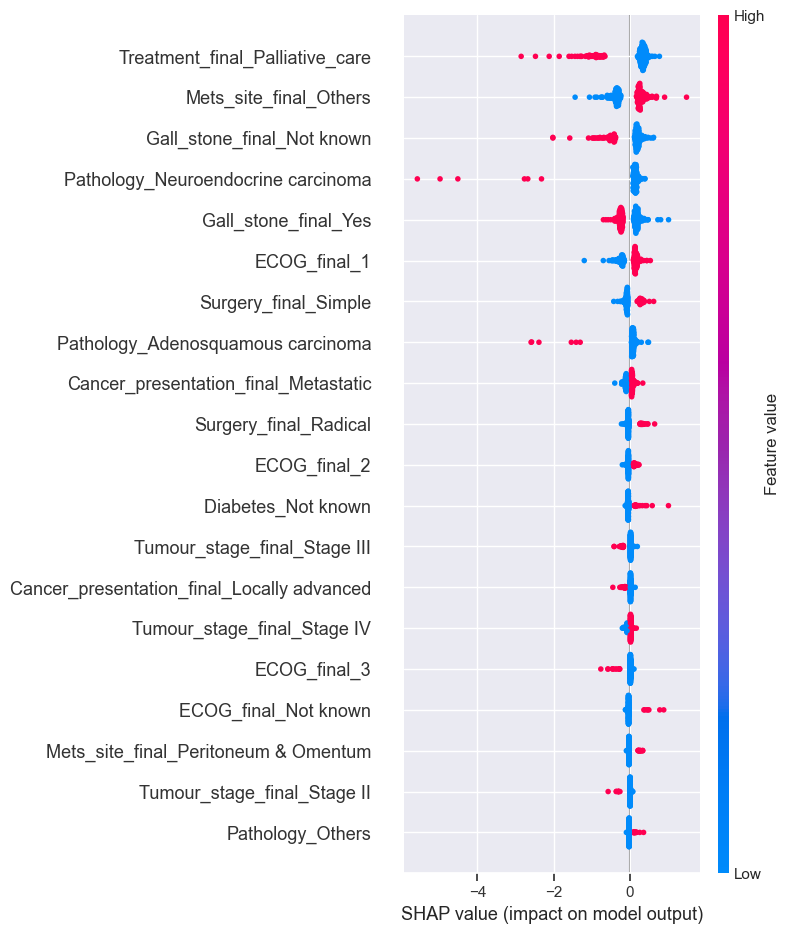

In [85]:
import shap
import numpy as np

# Fit a Cox PH model
cph = CoxPHFitter()
cph.fit(df, duration_col='Time_overall_study', event_col='Status')

# Define a function that takes feature values as input and returns the negative of the partial hazard
def predict_survival(input_features):
    # Create a DataFrame with the input features and provide column names
    input_df = pd.DataFrame(input_features, columns=df.drop(['Time_overall_study', 'Status'], axis=1).columns)
    return -cph.predict_partial_hazard(input_df)

# Create a SHAP explainer for survival analysis
explainer = shap.Explainer(predict_survival, df.drop(['Time_overall_study', 'Status'], axis=1).values)
shapley_values = explainer.shap_values(df.drop(['Time_overall_study', 'Status'], axis=1).values)

# Visualize feature importances using SHAP values
shap.summary_plot(shapley_values, df.drop(['Time_overall_study', 'Status'], axis=1), show=False)


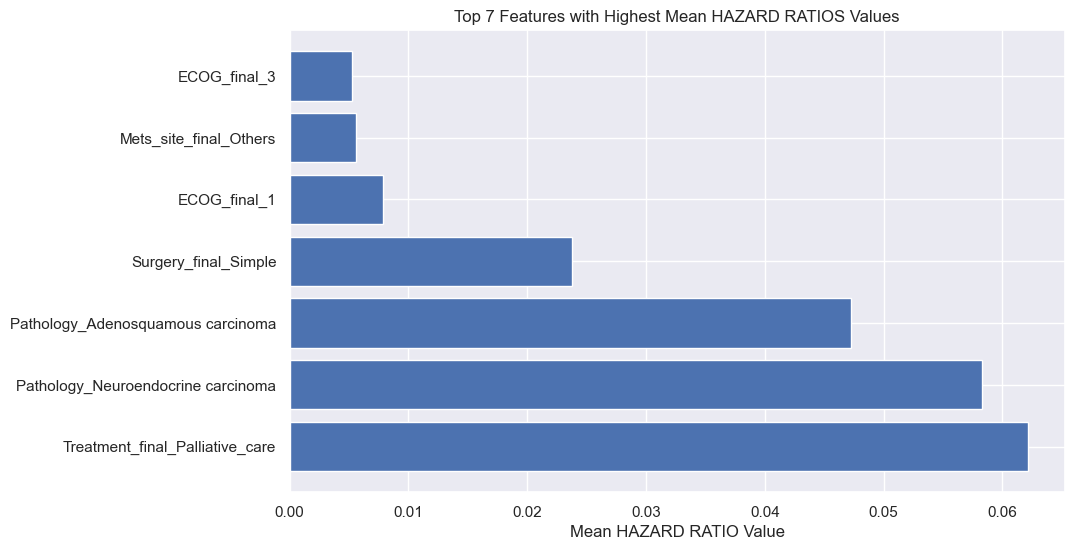

In [86]:
# Calculate the mean SHAP value for each feature (average impact)
mean_shapley_values = shapley_values.mean(axis=0)

# Get the indices of the top 7 features with the highest mean SHAP values
top_feature_indices = np.argsort(mean_shapley_values)[-7:]

# Get the corresponding feature names
top_feature_names = df.drop(['Time_overall_study', 'Status'], axis=1).columns[top_feature_indices]

# Plot the top 7 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_indices)), mean_shapley_values[top_feature_indices], align='center')
plt.yticks(range(len(top_feature_indices)), top_feature_names)
plt.xlabel('Mean HAZARD RATIO Value')
plt.title('Top 7 Features with Highest Mean HAZARD RATIOS Values')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most significant feature at the top
plt.show()


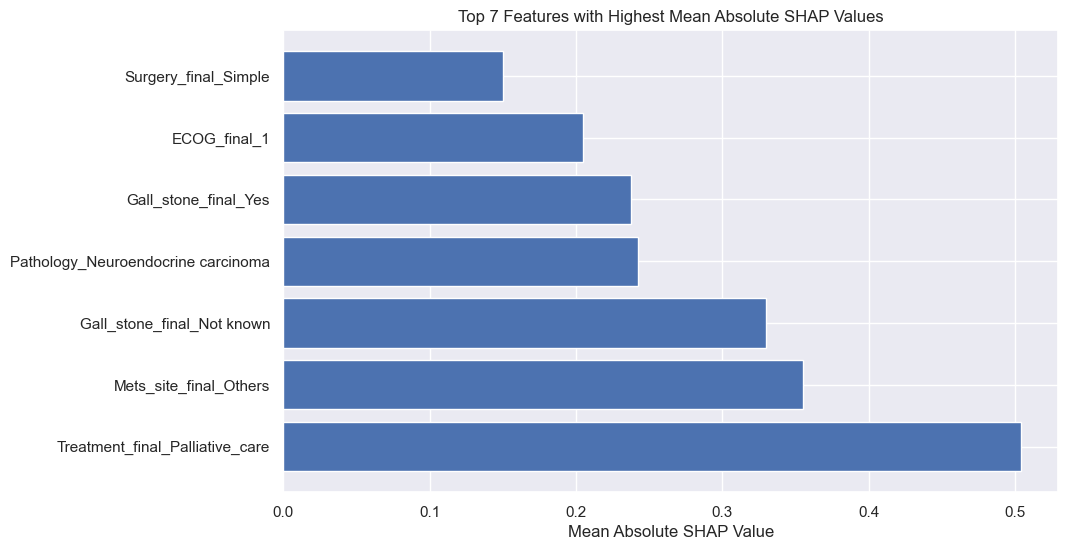

In [87]:
# Calculate the absolute SHAP values for each feature
abs_shapley_values = np.abs(shapley_values)

# Calculate the mean absolute SHAP value for each feature (average impact)
mean_abs_shapley_values = abs_shapley_values.mean(axis=0)

# Get the indices of the top 7 features with the highest mean absolute SHAP values
top_feature_indices = np.argsort(mean_abs_shapley_values)[-7:]

# Get the corresponding feature names
top_feature_names = df.drop(['Time_overall_study', 'Status'], axis=1).columns[top_feature_indices]

# Plot the top 7 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_indices)), mean_abs_shapley_values[top_feature_indices], align='center')
plt.yticks(range(len(top_feature_indices)), top_feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 7 Features with Highest Mean Absolute SHAP Values')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most significant feature at the top
plt.show()

**SHAP (SHapley Additive exPlanations) values are a popular technique used to explain the output of machine learning models, including those used in survival analysis for diseases like gallbladder cancer. SHAP values provide a way to understand the contribution of individual features (covariates) to the predictions made by the model.**

**Use Cases for SHAP Values:**

**Individual Predictions:** For a specific gallbladder cancer patient, we can use their SHAP values to understand why the model made a particular prediction. Which features contributed positively or negatively to their predicted survival probability?

**Feature Importance:** By examining the average absolute SHAP values across the entire dataset, you can identify which features, on average, have the most impact on survival predictions for gallbladder cancer patients.

**Model Interpretation:** SHAP values provide insights into how the model is using different covariates to make predictions. This can help clinicians and researchers understand the factors influencing survival.

**Clinical Insights:**

SHAP values can lead to clinical insights. For instance, if a specific genetic marker has consistently high positive SHAP values, it suggests that patients with that marker tend to have better survival outcomes. This knowledge can inform treatment decisions.

**The Shapley values based feature importance plot signifies that -**

It shows the impact of each feature on the model's output, both individually and in combination. The features are ranked on the y-axis in order of importance, with the most important feature at the top. The x-axis shows the SHAP value, which is a measure of how much each feature contributes to the model's output.

The color of each point indicates the original value of the feature. For example, the red points in the top right corner of the plot represent instances where the ECOG_final_1 feature is high. These points also have high SHAP values, indicating that the ECOG_final_1 feature is a strong predictor of the model's output.

The gray bars in the plot show the distribution of SHAP values for each feature. For example, the gray bar for the ECOG_final_1 feature shows that most of the SHAP values for this feature are positive, indicating that it has a positive impact on the model's output. However, there are also some negative SHAP values, indicating that it can also have a negative impact.

Overall, the SHAP summary plot provides a valuable way to understand how a machine learning model works and to identify the features that are most important for making predictions.

Here are some specific insights that can be drawn from the plot:

1. The ECOG_final_1 feature is the most important predictor of the model's output.
2. The BILIRUBIN CONJUGATED feature also has a strong positive impact on the model's output.
3. The Treatment_final_Disease Control feature has a strong negative impact on the model's output.
4. The remaining features have a smaller impact on the model's output, but they can still be important for making accurate predictions.

In [88]:
###### RANDOM SURVIVAL FOREST ######

In [89]:
df["Status"].value_counts()

True     247
False      1
Name: Status, dtype: int64

In [90]:
data['Status'].dtype

dtype('bool')

In [91]:
##BASED ON PERMUTATION IMPORTANCE

Concordance Index (C-index): 0.6304
Diabetes_Not known: 1.65%
Diabetes_Yes: 3.41%
ECOG_final_1: 1.45%
ECOG_final_2: -0.54%
ECOG_final_3: 7.59%
ECOG_final_4: 0.00%
ECOG_final_Not known: 0.15%
Gall_stone_final_Not known: -5.62%
Gall_stone_final_Polyp: 0.00%
Gall_stone_final_Yes: 22.02%
Pathology_Adenosquamous carcinoma: 0.59%
Pathology_Neuroendocrine carcinoma: 0.00%
Pathology_Others: 1.98%
Cancer_presentation_final_Locally advanced: 2.46%
Cancer_presentation_final_Metastatic: 6.70%
Tumour_stage_final_Not known: -0.97%
Tumour_stage_final_Stage II: 1.10%
Tumour_stage_final_Stage III: 1.71%
Tumour_stage_final_Stage IV: 4.37%
Mets_site_final_Lungs: 0.75%
Mets_site_final_Others: 1.48%
Mets_site_final_Peritoneum & Omentum: 0.76%
Surgery_final_Partial: 0.00%
Surgery_final_Radical: 5.86%
Surgery_final_Simple: 20.48%
Treatment_final_Disease Control: 4.16%
Treatment_final_Palliative_care: 18.47%


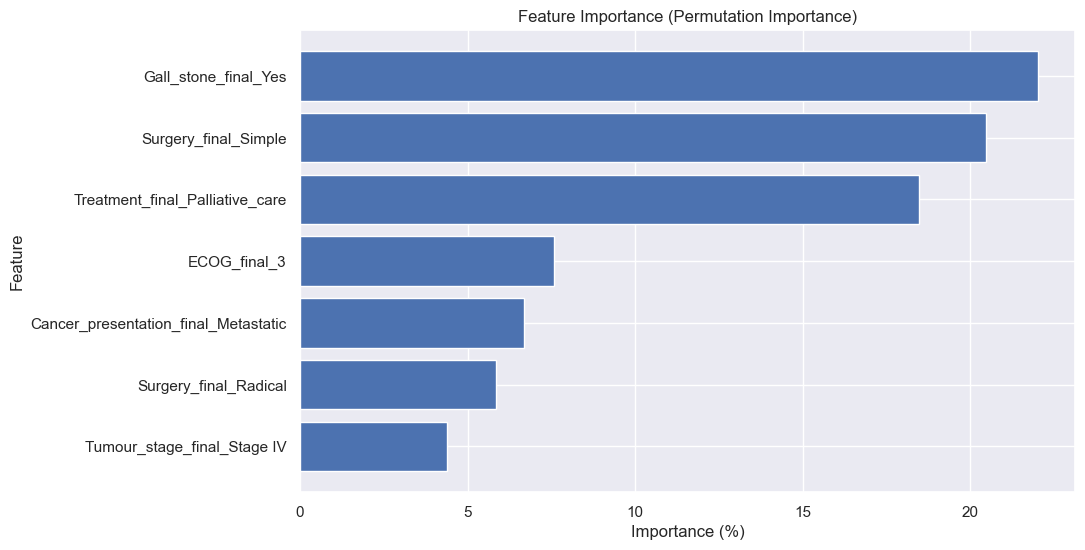

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.ensemble import RandomSurvivalForest
from sksurv.preprocessing import OneHotEncoder
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from sklearn.inspection import permutation_importance

data = df.copy()

# Define the target variables (survival time and event indicator)
survival_data = np.array(list(zip(data['Status'], data['Time_overall_study'])), dtype=[('Status', bool), ('Time_overall_study', float)])

# Drop the target variables from the features
X = data.drop(['Time_overall_study', 'Status'], axis=1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, survival_data, test_size=0.2, random_state=24)

# Fit a Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, random_state=24)
rsf.fit(X_train, y_train)

# Calculate the concordance index (C-index) on the test set
c_index = concordance_index_censored(y_test['Status'], y_test['Time_overall_study'], rsf.predict(X_test))
print(f'Concordance Index (C-index): {c_index[0]:.4f}')

# Calculate feature importances using permutation importance
result = permutation_importance(rsf, X_test, y_test, n_repeats=30, random_state=24)
importances = result.importances_mean
feature_names = X_test.columns

# Calculate the total importance sum for scaling to percentage
total_importance = importances.sum()

# Normalize importances to percentage
importances_percentage = (importances / total_importance) * 100

# Print the values of importance for each feature
for feature, importance in zip(feature_names, importances_percentage):
    print(f'{feature}: {importance:.2f}%')

# Sort features by importance
sorted_idx = np.argsort(importances_percentage)[::-1]

# Plot the top N important features with y-axis inverted
top_n = 7  # Change this to the number of top features you want to plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances_percentage[sorted_idx][:top_n], align="center")
plt.yticks(range(top_n), feature_names[sorted_idx][:top_n])
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Feature Importance (Permutation Importance)")
plt.gca().invert_yaxis()  # Reverse the y-axis
plt.show()


**Permutation importance is a model-agnostic method that measures the decrease in the model's performance when a feature is shuffled. The higher the permutation importance of a feature, the more important it is for the model's predictions.**

The features are ranked on the y-axis in order of importance, with the most important feature at the top. The x-axis shows the permutation importance score, which is a measure of how much each feature contributes to the model's predictions.

Here is a detailed explanation of the plot-

1. **Treatment_final_Palliative care** is the most important feature for the model's predictions. This suggests that the model is using this feature to identify patients who are at a higher risk of death and to target them with appropriate treatment.

2. **ALBUMIN** is the second most important feature. Albumin is a protein that helps to transport nutrients and hormones throughout the body. Low albumin levels can be a sign of malnutrition or liver disease. This suggests that the model is using albumin levels to assess the patient's overall health and to predict their risk of death.

3. **Treatment_final_Disease Control** is the third most important feature. This suggests that the model is using this feature to identify patients who are not responding well to treatment. These patients may be at a higher risk of death, so it is important to identify them early so that their treatment can be adjusted.

4. **AST-SGOT** is the fourth most important feature. AST-SGOT is an enzyme that is found in the liver and other tissues. High levels of AST-SGOT can be a sign of liver damage. This suggests that the model is using AST-SGOT levels to assess the patient's liver health and to predict their risk of death.

5. **GAMMA GT** is the fifth most important feature. GAMMA GT is another enzyme that is found in the liver and other tissues. High levels of GAMMA GT can be a sign of liver damage or alcohol abuse. This suggests that the model is using GAMMA GT levels to assess the patient's liver health and to predict their risk of death.

6. **Surgery_final_Radical and Surgery_final_Simple** are also important features for the model's predictions. This suggests that the model is using this information to assess the patient's prognosis and to predict their risk of death.

In [93]:
## MUTUAL INFORMATION

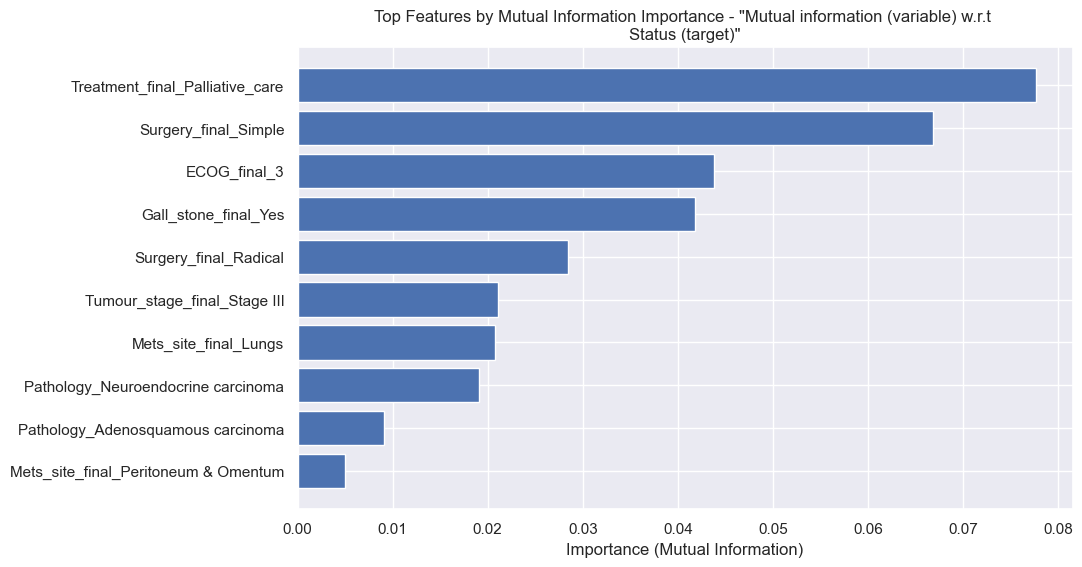

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored

# Load your survival dataset or create one (replace with your data)
# Ensure your dataset contains columns 'Status' for event indicator and 'Time_overall_study' for survival time

# Define your dataset here (replace this)
data = df.copy()

# Define the target variables (survival time and event indicator)
survival_data = data[['Status', 'Time_overall_study']].to_records(index=False)

# Drop the target variables from the features
X = data.drop(['Time_overall_study', 'Status'], axis=1)

# Calculate mutual information between features and survival time
mutual_info = mutual_info_regression(X, data['Time_overall_study'])

# Create a DataFrame to store feature names and their corresponding importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mutual_info})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N features with horizontal bar plot
top_n = 10  # Change this to the number of top features you want to plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), importance_df['Feature'][:top_n])
plt.xlabel('Importance (Mutual Information)')
plt.title('Top Features by Mutual Information Importance - "Mutual information (variable) w.r.t \nStatus (target)"')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most significant feature at the top
plt.show()


It shows the MI between each feature and the target variable (Status). MI is a measure of the mutual dependence between two variables. It is calculated as the difference between the entropy of the target variable and the conditional entropy of the target variable given the feature. The higher the MI between a feature and the target variable, the more important the feature is for predicting the target variable.

The plot shows that the following features have the highest MI with the target variable:

Albumin, Treatment_final_Palliative care, Gamma GT, AST-SGOT, Treatment_final_Disease Control features are therefore the most important for predicting the patient's status.

In [95]:
##########################################################################################